### Imports and graphing function

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import torch

# Chart Function
def plot_results(file_paths, labels):
    """
    Plots various metrics from machine learning training runs.

    Parameters:
    - file_paths: List of strings representing the file paths to CSV files.
    - labels: List of strings representing the labels for each dataset.
    """

    # Read DataFrames
    dataframes = [pd.read_csv(fp) for fp in file_paths]
    num_datasets = len(dataframes)

    # Extract data
    epochs_list = [df['Epoch'] for df in dataframes]
    test_accuracy_list = [df['Test Accuracy'] for df in dataframes]
    test_error_list = [df['Test Error'] for df in dataframes]
    training_loss_list = [df['Training Loss'] for df in dataframes]
    test_loss_list = [df['Test Loss'] for df in dataframes]
    x_k_list = [df['x_k Comparison'] if 'x_k Comparison' in df.columns else pd.Series([0] * len(df)) for df in dataframes]
    x_ag_k_list = [df['x_ag_k Comparison'] if 'x_ag_k Comparison' in df.columns else pd.Series([0] * len(df)) for df in dataframes]

    # Square the gradient norms
    training_grad_norm_squared_list = [df['Training Gradient Norm']**2 for df in dataframes]
    test_grad_norm_squared_list = [df['Test Gradient Norm']**2 for df in dataframes]
    total_training_time_list = [df['Training Time (s)'].cumsum() for df in dataframes]

    # Check if Epochs are the same across datasets
    epoch_lengths = [len(e) for e in epochs_list]
    max_epochs = max(epoch_lengths)
    if len(set(epoch_lengths)) > 1:
        print(f"Warning: Epochs in dataset(s) differ from the longest dataset.")

    # Set up colors using a colormap
    cmap_name = 'tab10' if num_datasets <= 10 else 'tab20'
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i % cmap.N) for i in range(num_datasets)]

    # Create subplots with 7 rows and 2 columns
    fig, axes = plt.subplots(7, 2, figsize=(20, 38))

    # Row 1: Test Accuracy over Epochs and Training Time
    # Plot 1: Test Accuracy over Epochs (left plot)
    for i in range(num_datasets):
        axes[0, 0].plot(epochs_list[i], test_accuracy_list[i], label=labels[i], color=colors[i])
    axes[0, 0].axhline(y=0.68, color='gray', linestyle='--', linewidth=1)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Test Accuracy')
    axes[0, 0].set_title(f'Test Accuracy over {max_epochs} Epochs')
    axes[0, 0].legend()

    # Plot 2: Test Accuracy vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[0, 1].plot(total_training_time_list[i], test_accuracy_list[i], label=labels[i], color=colors[i])
    axes[0, 1].axhline(y=0.68, color='gray', linestyle='--', linewidth=1)
    axes[0, 1].set_xlabel('Training Time (s)')
    axes[0, 1].set_ylabel('Test Accuracy')
    axes[0, 1].set_title('Test Accuracy vs Total Training Time')
    axes[0, 1].legend()

    # Row 2: Training Loss over Epochs and Test Loss over Epochs
    # Plot 3: Training Loss over Epochs (left plot)
    for i in range(num_datasets):
        axes[1, 0].plot(epochs_list[i], training_loss_list[i], label=labels[i], color=colors[i])
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Training Loss')
    axes[1, 0].set_title(f'Training Loss over {max_epochs} Epochs')
    axes[1, 0].legend()

    # Plot 4: Test Loss over Epochs (right plot)
    for i in range(num_datasets):
        axes[1, 1].plot(epochs_list[i], test_loss_list[i], label=labels[i], color=colors[i])
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Test Loss')
    axes[1, 1].set_title(f'Test Loss over {max_epochs} Epochs')
    axes[1, 1].legend()

    # Row 3: Training Gradient Norm Squared over Epochs and Test Gradient Norm Squared over Epochs
    # Plot 5: Training Gradient Norm Squared over Epochs (left plot)
    for i in range(num_datasets):
        axes[2, 0].plot(epochs_list[i], training_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[2, 0].set_xlabel('Epoch')
    axes[2, 0].set_ylabel('Gradient Norm Squared')
    axes[2, 0].set_title(f'Training Gradient Norm Squared over {max_epochs} Epochs')
    axes[2, 0].legend()

    # Plot 6: Test Gradient Norm Squared over Epochs (right plot)
    for i in range(num_datasets):
        axes[2, 1].plot(epochs_list[i], test_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[2, 1].set_xlabel('Epoch')
    axes[2, 1].set_ylabel('Gradient Norm Squared')
    axes[2, 1].set_title(f'Test Gradient Norm Squared over {max_epochs} Epochs')
    axes[2, 1].legend()

    # Row 4: Training Loss vs Total Training Time and Test Loss vs Total Training Time
    # Plot 7: Training Loss vs Total Training Time (left plot)
    for i in range(num_datasets):
        axes[3, 0].plot(total_training_time_list[i], training_loss_list[i], label=labels[i], color=colors[i])
    axes[3, 0].set_xlabel('Training Time (s)')
    axes[3, 0].set_ylabel('Training Loss')
    axes[3, 0].set_title('Training Loss vs Total Training Time')
    axes[3, 0].legend()

    # Plot 8: Test Loss vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[3, 1].plot(total_training_time_list[i], test_loss_list[i], label=labels[i], color=colors[i])
    axes[3, 1].set_xlabel('Training Time (s)')
    axes[3, 1].set_ylabel('Test Loss')
    axes[3, 1].set_title('Test Loss vs Total Training Time')
    axes[3, 1].legend()

    # Row 5: Training Gradient Norm Squared vs Total Training Time and Test Gradient Norm Squared vs Total Training Time
    # Plot 9: Training Gradient Norm Squared vs Total Training Time (left plot)
    for i in range(num_datasets):
        axes[4, 0].plot(total_training_time_list[i], training_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[4, 0].set_xlabel('Training Time (s)')
    axes[4, 0].set_ylabel('Gradient Norm Squared')
    axes[4, 0].set_title('Training Gradient Norm Squared vs Total Training Time')
    axes[4, 0].legend()

    # Plot 10: Test Gradient Norm Squared vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[4, 1].plot(total_training_time_list[i], test_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[4, 1].set_xlabel('Training Time (s)')
    axes[4, 1].set_ylabel('Gradient Norm Squared')
    axes[4, 1].set_title('Test Gradient Norm Squared vs Total Training Time')
    axes[4, 1].legend()

    # Row 6: Test Error Rate over Epochs and Training Time
    # Plot 11: Test Error Rate vs Epoch (left plot)
    for i in range(num_datasets):
        axes[5, 0].plot(epochs_list[i], test_error_list[i], label=labels[i], color=colors[i])
    axes[5, 0].set_xlabel('Epoch')
    axes[5, 0].set_ylabel('Test Error')
    axes[5, 0].set_title(f'Test Error over {max_epochs} Epochs')
    axes[5, 0].legend()

    # Plot 12: Test Error Rate vs Training Time (right plot)
    for i in range(num_datasets):
        axes[5, 1].plot(total_training_time_list[i], test_error_list[i], label=labels[i], color=colors[i])
    axes[5, 1].set_xlabel('Training Time (s)')
    axes[5, 1].set_ylabel('Test Error')
    axes[5, 1].set_title('Test Error vs Total Training Time')
    axes[5, 1].legend()

    # Row 7: x_bar and x_k comparisons
    # Plot 11: x_bar vs x_k vs Epoch (left plot)
    for i in range(num_datasets):
        axes[6, 0].plot(epochs_list[i], x_k_list[i], label=labels[i], color=colors[i])
    axes[6, 0].set_xlabel('Epoch')
    axes[6, 0].set_ylabel('||x_bar - x_k||')
    axes[6, 0].set_title(f'||x_bar - x_k|| over {max_epochs} Epochs')
    axes[6, 0].legend()

    # Plot 12: x_bar vs x_ag_k vs Epoch (right plot)
    for i in range(num_datasets):
        axes[6, 1].plot(epochs_list[i], x_ag_k_list[i], label=labels[i], color=colors[i])
    axes[6, 1].set_xlabel('Epoch')
    axes[6, 1].set_ylabel('||x_bar - x_ag_k||')
    axes[6, 1].set_title(f'||x_bar - x_ag_k|| over {max_epochs} Epochs')
    axes[6, 1].legend()

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

### AR Analysis

In [ ]:
one = "generated/hinge/n_2000_m_1000/AR/no-lr/100/1000/2024-12-03-14:12:55/results.csv"
two = "generated/hinge/n_2000_m_1000/AR/no-lr/100/1000/2024-12-03-14:13:46/results.csv"

files = [one, two]
labels = ["one", "two"]

plot_results(files, labels)


In [ ]:
# diverging runs

e1500 = "generated/hinge/n_2000_m_1000/AR/no-lr/1493/2024-12-04-09:49:16/results.csv"
e6000 = "generated/hinge/n_2000_m_1000/AR/no-lr/5897/1000/2024-12-04-10:01:06/results.csv"

files = [e1500, e6000]
labels = ["AR w/ AG, 1500 iterations", "AR w/ AG, 6000 iterations"]

plot_results(files, labels)

In [ ]:
# converging runs

e110 = "generated/hinge/n_2000_m_1000/AR/no-lr/110/1000/2024-12-04-09:53:04/results.csv"
e110_2 = "generated/hinge/n_2000_m_1000/AR/no-lr/110/1000/2024-12-04-09:57:01/results.csv"
e136 = "generated/hinge/n_2000_m_1000/AR/no-lr/136/1000/2024-12-04-09:57:49/results.csv"

files = [e110, e110_2, e136]
labels = ["AR w/ AG, 110 iterations", "AR w/ AG, 110 iterations (2)", "AR w/ AG, 136 iterations"]

plot_results(files, labels)

In [ ]:
# Best AR vs. AG vs. AG_pf

ar = "generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_10.0/136/1000/2024-12-04-09:57:49/results.csv"
ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-11-06-16:28:14/results.csv"
ag_pf = "generated/hinge/n_2000_m_1000/AG_pf/lr-0.01/200/no_batching/no_wd/2024-12-12-14:10:12/results.csv"

files = [ar, ag, ag_pf]
labels = ["AR w/ AG, 136 iterations", "AG w/ 200 iterations", "Param-free AG w/ 200 iterations"]

plot_results(files, labels)

#### AR vs AG Through 30 epochs

In [10]:
ar_df = pd.read_csv("generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_10.0/136/1000/2024-12-04-09:57:49/results.csv")
ag_df = pd.read_csv("generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-11-06-16:28:14/results.csv")
ag_pf_df = pd.read_csv("generated/hinge/n_2000_m_1000/AG_pf/lr-0.01/200/no_batching/no_wd/2024-12-12-14:10:12/results.csv")

In [27]:
ar_df.head()

,Subproblem,Iteration,Epoch,Training Loss,Training Gradient Norm,Training Time (s),Test Loss,Test Gradient Norm,Test Accuracy,Test Error,x_k Comparison,x_ag_k Comparison
0,1,1,1,1.019294,0.422298,0.082850,1.003211,0.250641,0.5093,0.4907,1.142885,1.124351
1,1,2,2,0.994098,0.393303,0.013710,0.994143,0.237511,0.5278,0.4722,1.108680,1.103336
2,1,3,3,0.964283,0.364193,0.010204,0.982883,0.230585,0.5559,0.4441,1.070114,1.079440
3,1,4,4,0.931811,0.333729,0.010168,0.970091,0.227097,0.5800,0.4200,1.039333,1.056504
4,1,5,5,0.898696,0.300849,0.009606,0.956520,0.224642,0.6034,0.3966,1.028272,1.038446


In [28]:
ag_df.head()

,Epoch,Training Loss,Total Training Loss,Training Gradient Norm,Training Time (s),Test Loss,Test Gradient Norm,Test Accuracy,Test Error,x_k Comparison,x_ag_k Comparison
0,1,0.984066,1.004354,0.402547,0.048453,0.997442,0.240259,0.5233,0.4767,1.130374,1.111550
1,2,0.945805,0.977416,0.389094,0.011979,0.988030,0.232380,0.5474,0.4526,1.094942,1.089717
2,3,0.892166,0.942607,0.373036,0.010374,0.975378,0.227727,0.5738,0.4262,1.056473,1.065403
3,4,0.826146,0.900864,0.353593,0.013964,0.960118,0.224529,0.6006,0.3994,1.032765,1.043979
4,5,0.751317,0.853342,0.330632,0.010234,0.943076,0.221540,0.6204,0.3796,1.045547,1.032014


In [20]:
ag_pf_df.head()

,Epoch,Training Loss,Total Training Loss,Training Gradient Norm,Training Time (s),Test Loss,Test Gradient Norm,Test Accuracy,Test Error,x_k Comparison,x_ag_k Comparison
0,1,0.858524,0.858524,0.414394,0.044052,0.980267,0.289406,0.5441,0.4559,1.075862,0.0
1,2,0.740850,0.747984,0.714629,0.015619,1.013239,0.682824,0.5071,0.4929,1.181559,0.0
2,3,0.709236,0.657788,0.975365,0.018614,1.062698,0.920178,0.5303,0.4697,1.452568,0.0
3,4,0.504018,0.579739,0.675901,0.017562,0.962866,0.678113,0.5761,0.4239,1.757685,0.0
4,5,0.389733,0.503051,0.573085,0.020681,0.920219,0.570291,0.6093,0.3907,2.172332,0.0


In [11]:
ag_pf_30 = ag_pf_df.iloc[:30]
ag_pf_30.describe()

,Epoch,Training Loss,Total Training Loss,Training Gradient Norm,Training Time (s),Test Loss,Test Gradient Norm,Test Accuracy,Test Error,x_k Comparison,x_ag_k Comparison
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,15.500000,0.155118,0.188046,0.241883,0.024946,1.015081,0.430701,0.648873,0.351127,5.564085,0.0
std,8.803408,0.249015,0.252377,0.289770,0.013578,0.069153,0.244368,0.049918,0.049918,2.408354,0.0
min,1.000000,0.000018,0.000005,0.001493,0.013958,0.875327,0.231228,0.507100,0.318700,1.075862,0.0
25%,8.250000,0.000077,0.003831,0.003183,0.016771,0.974034,0.232474,0.640625,0.319375,3.787799,0.0
50%,15.500000,0.018758,0.060754,0.144265,0.021567,1.019288,0.325272,0.671950,0.328050,6.397954,0.0
75%,22.750000,0.236951,0.281372,0.405992,0.025230,1.072365,0.528653,0.680625,0.359375,7.755509,0.0
max,30.000000,0.858524,0.858524,0.975365,0.081038,1.177094,1.182893,0.681300,0.492900,7.926498,0.0


In [13]:
ag_pf_30.to_csv("generated/hinge/n_2000_m_1000/cutoff30/ar_pf.csv", index=False)

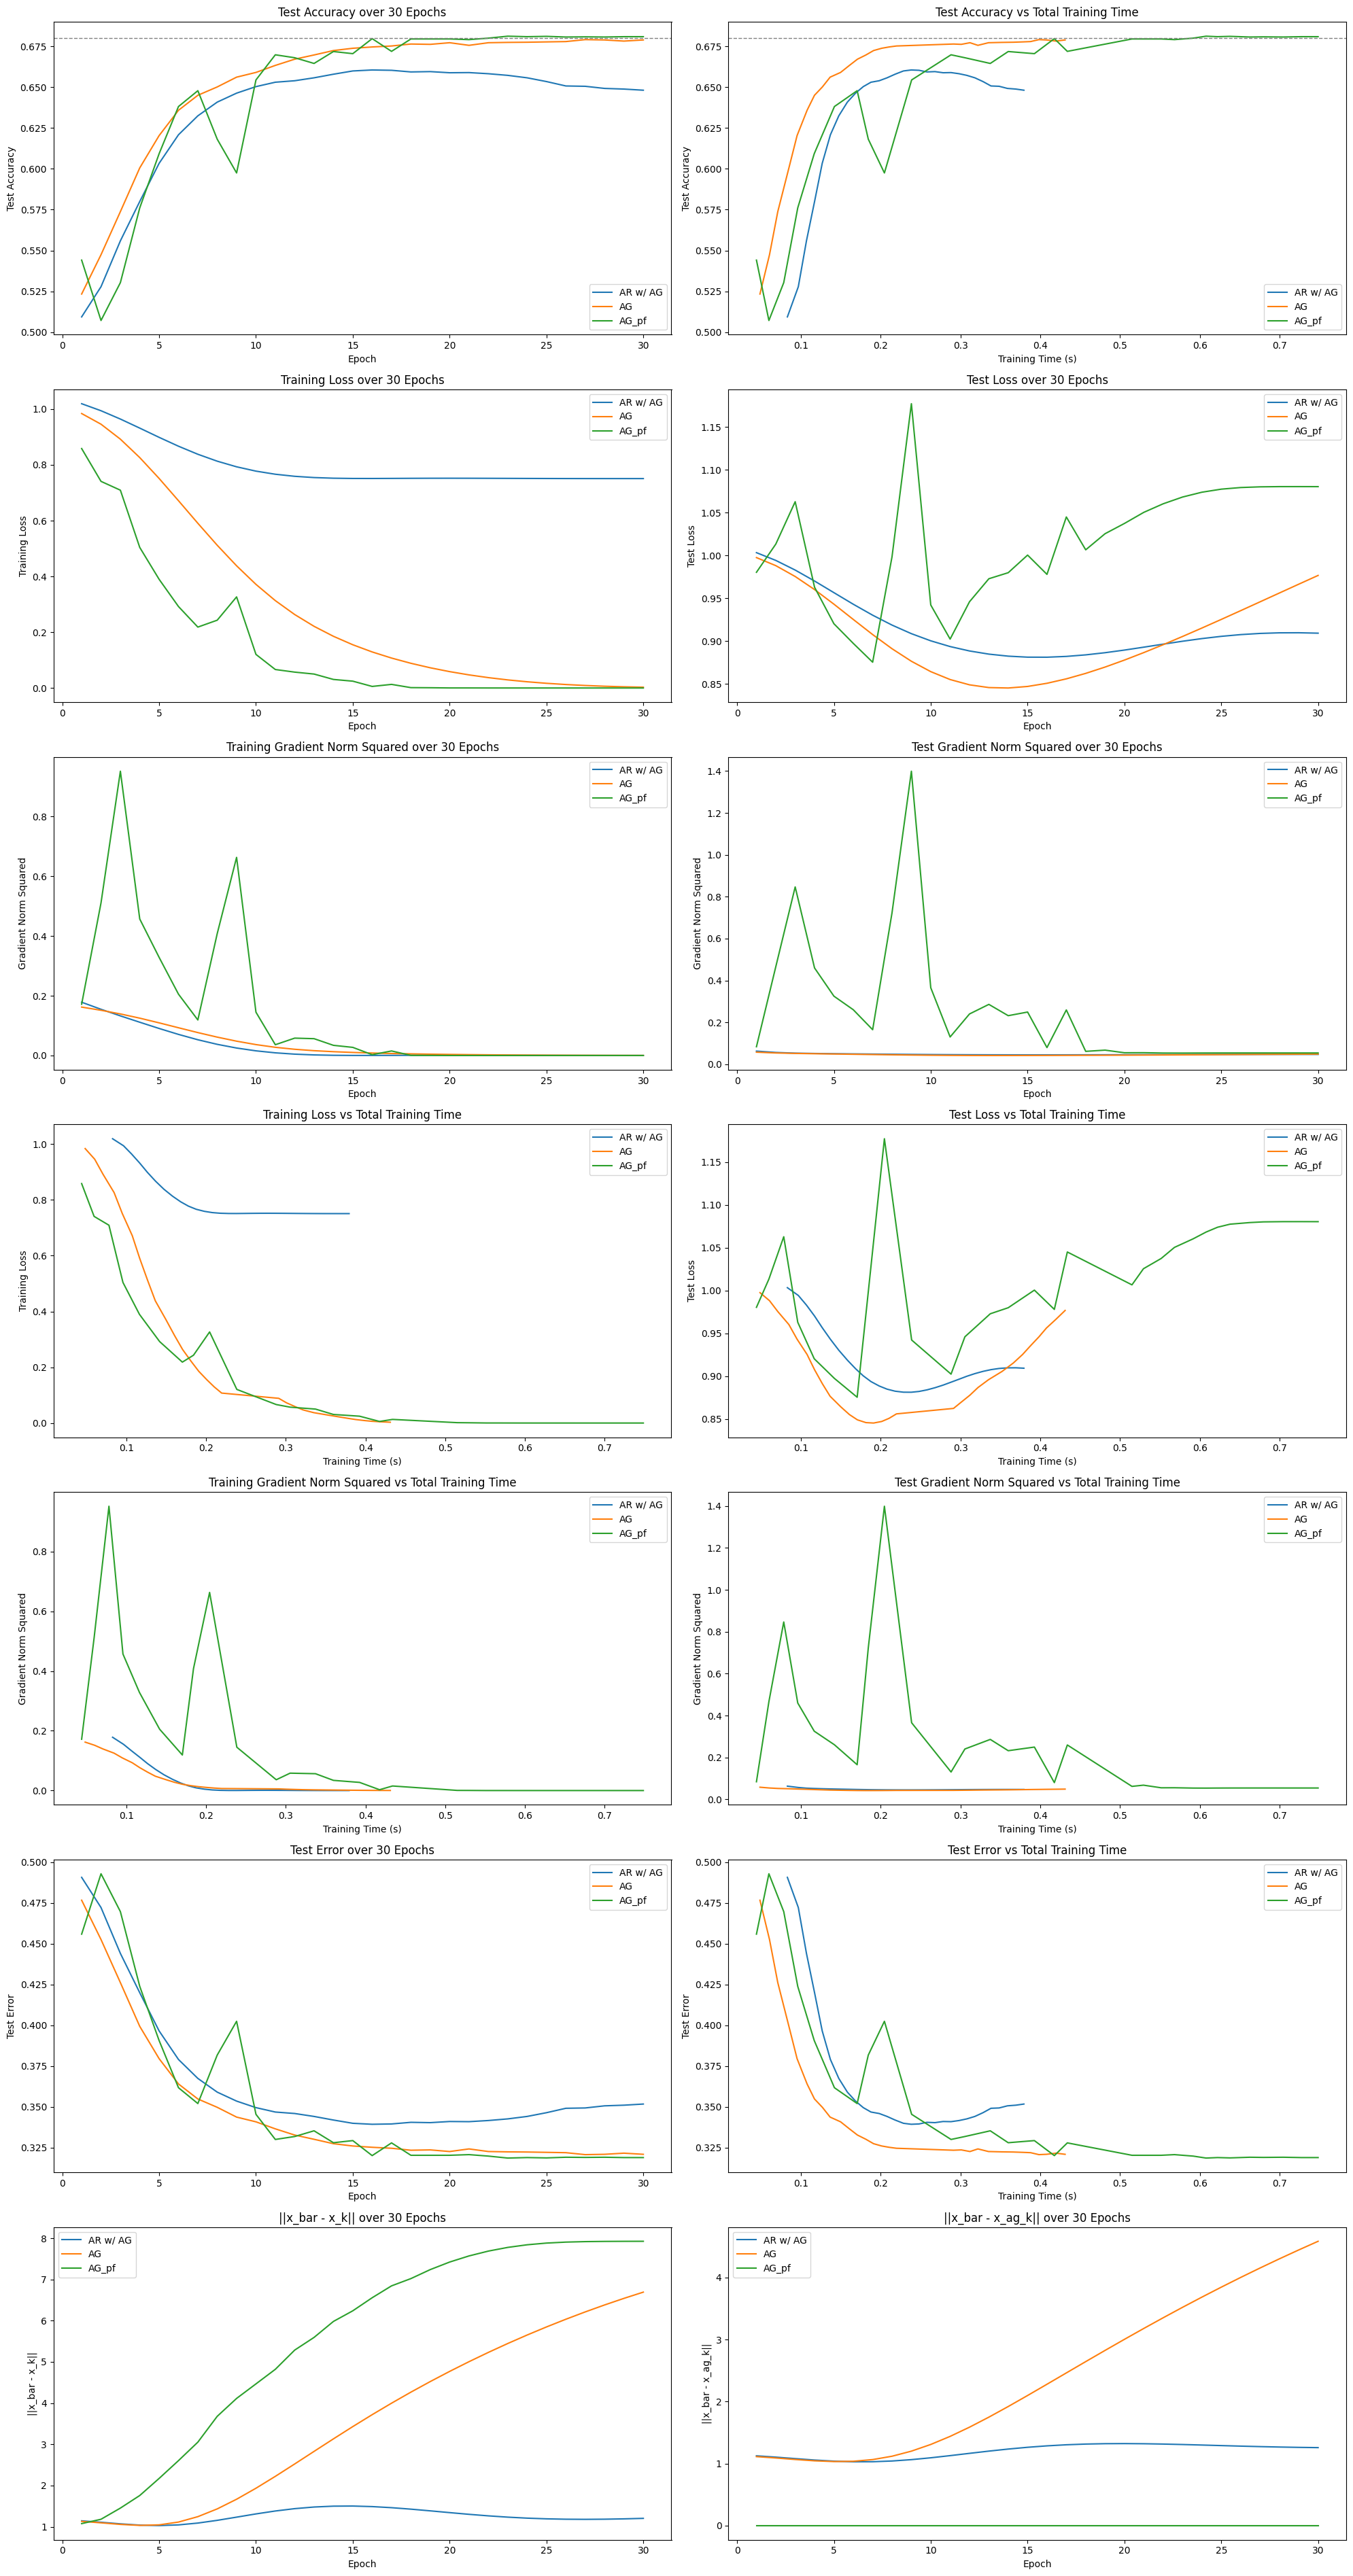

In [26]:
# Best AR vs. AG through 30 epochs

ar = "generated/hinge/n_2000_m_1000/cutoff30/ar.csv"
ag = "generated/hinge/n_2000_m_1000/cutoff30/ag.csv"
ag_pf = "generated/hinge/n_2000_m_1000/cutoff30/ar_pf.csv"

files = [ar, ag, ag_pf]
labels = ["AR w/ AG", "AG", "AG_pf"]

plot_results(files, labels)

#### Data Comparison

In [22]:
merged_df = pd.merge(
    ar_df,
    ag_df,
    on="Epoch",
    suffixes=("_AR", "_AG")
)

ag_pf_df = ag_pf_df.rename(
    columns={col: f"{col}_AG_pf" for col in ag_pf_df.columns if col != "Epoch"}
)

# Perform the second merge
merged_df = pd.merge(
    merged_df,
    ag_pf_df,
    on="Epoch"
)

merged_df.head()

,Subproblem,Iteration,Epoch,Training Loss_AR,Training Gradient Norm_AR,Training Time (s)_AR,Test Loss_AR,Test Gradient Norm_AR,Test Accuracy_AR,Test Error_AR,...,Training Loss_AG_pf,Total Training Loss_AG_pf,Training Gradient Norm_AG_pf,Training Time (s)_AG_pf,Test Loss_AG_pf,Test Gradient Norm_AG_pf,Test Accuracy_AG_pf,Test Error_AG_pf,x_k Comparison_AG_pf,x_ag_k Comparison_AG_pf
0,1,1,1,1.019294,0.422298,0.082850,1.003211,0.250641,0.5093,0.4907,...,0.858524,0.858524,0.414394,0.044052,0.980267,0.289406,0.5441,0.4559,1.075862,0.0
1,1,2,2,0.994098,0.393303,0.013710,0.994143,0.237511,0.5278,0.4722,...,0.740850,0.747984,0.714629,0.015619,1.013239,0.682824,0.5071,0.4929,1.181559,0.0
2,1,3,3,0.964283,0.364193,0.010204,0.982883,0.230585,0.5559,0.4441,...,0.709236,0.657788,0.975365,0.018614,1.062698,0.920178,0.5303,0.4697,1.452568,0.0
3,1,4,4,0.931811,0.333729,0.010168,0.970091,0.227097,0.5800,0.4200,...,0.504018,0.579739,0.675901,0.017562,0.962866,0.678113,0.5761,0.4239,1.757685,0.0
4,1,5,5,0.898696,0.300849,0.009606,0.956520,0.224642,0.6034,0.3966,...,0.389733,0.503051,0.573085,0.020681,0.920219,0.570291,0.6093,0.3907,2.172332,0.0


In [23]:
print(merged_df.columns.tolist())

['Subproblem', 'Iteration', 'Epoch', 'Training Loss_AR', 'Training Gradient Norm_AR', 'Training Time (s)_AR', 'Test Loss_AR', 'Test Gradient Norm_AR', 'Test Accuracy_AR', 'Test Error_AR', 'x_k Comparison_AR', 'x_ag_k Comparison_AR', 'Training Loss_AG', 'Total Training Loss', 'Training Gradient Norm_AG', 'Training Time (s)_AG', 'Test Loss_AG', 'Test Gradient Norm_AG', 'Test Accuracy_AG', 'Test Error_AG', 'x_k Comparison_AG', 'x_ag_k Comparison_AG', 'Training Loss_AG_pf', 'Total Training Loss_AG_pf', 'Training Gradient Norm_AG_pf', 'Training Time (s)_AG_pf', 'Test Loss_AG_pf', 'Test Gradient Norm_AG_pf', 'Test Accuracy_AG_pf', 'Test Error_AG_pf', 'x_k Comparison_AG_pf', 'x_ag_k Comparison_AG_pf']


In [24]:
cols = [
    "Epoch",
    "Test Accuracy_AR",
    "Test Accuracy_AG",
    "Test Accuracy_AG_pf",
    "Training Gradient Norm_AR",
    "Training Gradient Norm_AG",
    "Training Gradient Norm_AG_pf",
    "Training Loss_AR",
    "Training Loss_AG",
    "Training Loss_AG_pf",
    "Test Gradient Norm_AR",
    "Test Gradient Norm_AG",
    "Test Gradient Norm_AG_pf",
    "Test Loss_AR",
    "Test Loss_AG",
    "Test Loss_AG_pf"
]

merged_clean = merged_df[cols]
merged_clean.head(50)

,Epoch,Test Accuracy_AR,Test Accuracy_AG,Test Accuracy_AG_pf,Training Gradient Norm_AR,Training Gradient Norm_AG,Training Gradient Norm_AG_pf,Training Loss_AR,Training Loss_AG,Training Loss_AG_pf,Test Gradient Norm_AR,Test Gradient Norm_AG,Test Gradient Norm_AG_pf,Test Loss_AR,Test Loss_AG,Test Loss_AG_pf
0,1,0.5093,0.5233,0.5441,0.422298,0.402547,0.414394,1.019294,0.984066,8.585238e-01,0.250641,0.240259,0.289406,1.003211,0.997442,0.980267
1,2,0.5278,0.5474,0.5071,0.393303,0.389094,0.714629,0.994098,0.945805,7.408500e-01,0.237511,0.232380,0.682824,0.994143,0.988030,1.013239
2,3,0.5559,0.5738,0.5303,0.364193,0.373036,0.975365,0.964283,0.892166,7.092359e-01,0.230585,0.227727,0.920178,0.982883,0.975378,1.062698
3,4,0.5800,0.6006,0.5761,0.333729,0.353593,0.675901,0.931811,0.826146,5.040178e-01,0.227097,0.224529,0.678113,0.970091,0.960118,0.962866
4,5,0.6034,0.6204,0.6093,0.300849,0.330632,0.573085,0.898696,0.751317,3.897327e-01,0.224642,0.221540,0.570291,0.956520,0.943076,0.920219
5,6,0.6209,0.6359,0.6382,0.265825,0.304815,0.453093,0.866898,0.671542,2.921141e-01,0.222529,0.218535,0.510337,0.942992,0.925237,0.897287
6,7,0.6325,0.6451,0.6479,0.229656,0.277012,0.344908,0.838042,0.590588,2.183895e-01,0.220570,0.215549,0.406318,0.930206,0.907592,0.875327
7,8,0.6409,0.6502,0.6182,0.193479,0.248118,0.638676,0.813244,0.511848,2.431387e-01,0.218687,0.212665,0.850462,0.918656,0.891058,0.998412
8,9,0.6464,0.6562,0.5975,0.158345,0.219092,0.814278,0.793068,0.438146,3.266322e-01,0.216932,0.210032,1.182893,0.908642,0.876425,1.177094
9,10,0.6504,0.6591,0.6545,0.125181,0.191168,0.380785,0.777574,0.371578,1.204900e-01,0.215404,0.207804,0.604510,0.900287,0.864306,0.942119


#### Comparison at sigma_1 = {L_approx / 10, L_approx / 15, L_approx / 5}

**For sigma_1 = L / 10.0: 30% convergence**
<br>

3/10 converged (iterations = 110, 100, 136)

<br>
<br>

**For sigma_1 = L / 15.0: 40% convergence**
<br>

Converged: 

158-3 (2.3e-7), 197-4 (9e-7), 162-3 (2.8e-7), 129-2 (1e-6)
<br>
<br>

Diverged: sub3, sub4, sub3, 1295-12 (norm=0.06), sub5, sub3

<br>
<br>

**For sigma_1 = L / 5.0: 50% convergence**
<br>
<br>

Converged:

84-2 (1.61e-7), 84-2 (1.49e-7), 110-3 (5e-7), 139-4 (2e-6), 84-2 (1.54e-7)
<br>
<br>

Diverged:

1092-15 (7.7), sub5, sub4, sub3, 2200-12 (0.1)


In [ ]:
# comparing graphs

r10 = "generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_10.0/136/1000/2024-12-04-09:57:49/results.csv"
r15 = "generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_15.0/158/2024-12-04-11:05:18/results.csv"
r5 = "generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_5.0/85/2024-12-04-11:14:56/results.csv"

files = [r10, r15, r5]
labels = ["AR w/ AG, ratio = 10", "AR w/ AG, ratio = 15", "AR w/ AG, ratio = 5"]

plot_results(files, labels)